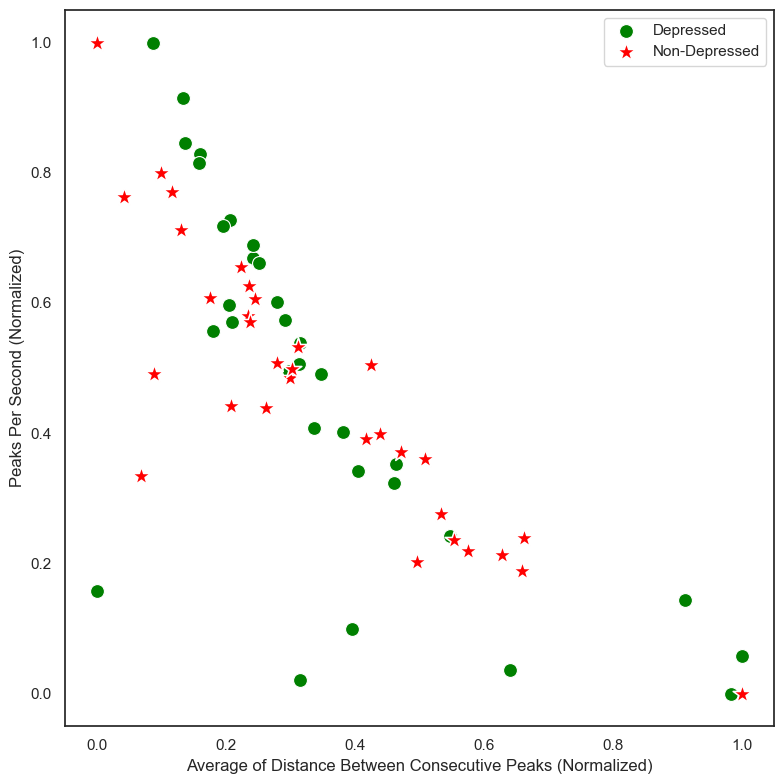

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('EATD_CORPUS - EATD_CORPUS.csv.csv')

# Extract features and labels
X_test = data[data['Class'] == 'Testing'][['Peaks_Per_Second', 'Average_Distance_Between_Peaks_in_seconds']]
y_test = data[data['Class'] == 'Testing']['Label']

depressed_samples = X_test[y_test == 'Depressed'].sample(n=32, random_state=42)
not_depressed_samples = X_test[y_test == 'Not_Depressed'].sample(n=32, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
depressed_samples_scaled = scaler.fit_transform(depressed_samples)
not_depressed_samples_scaled = scaler.fit_transform(not_depressed_samples)

sns.set(style='white')

plt.figure(figsize=(8, 8))  # Square figure
sns.scatterplot(x=depressed_samples_scaled[:, 1], y=depressed_samples_scaled[:, 0], label='Depressed', color='green', marker='o', s=100, alpha=1.0)  # Circular markers with equal size
sns.scatterplot(x=not_depressed_samples_scaled[:, 1], y=not_depressed_samples_scaled[:, 0], label='Non-Depressed', color='red', marker='*', s=200, alpha=1.0)  # Slightly larger star markers
plt.xlabel('Average of Distance Between Consecutive Peaks (Normalized)')
plt.ylabel('Peaks Per Second (Normalized)')
plt.legend()
plt.tight_layout()
plt.show()


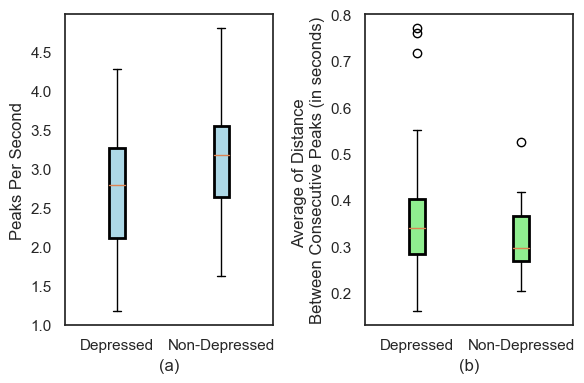

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('EATD_CORPUS - EATD_CORPUS.csv.csv')

# Extract features and labels
X_test = data[data['Class'] == 'Testing'][['Peaks_Per_Second', 'Average_Distance_Between_Peaks_in_seconds']]
y_test = data[data['Class'] == 'Testing']['Label']

depressed_samples = X_test[y_test == 'Depressed'].sample(n=32, random_state=42)
not_depressed_samples = X_test[y_test == 'Not_Depressed'].sample(n=32, random_state=42)

# Create a list of the selected samples and their labels
samples = [depressed_samples['Peaks_Per_Second'], not_depressed_samples['Peaks_Per_Second']]
samples_distance = [depressed_samples['Average_Distance_Between_Peaks_in_seconds'], not_depressed_samples['Average_Distance_Between_Peaks_in_seconds']]
labels = ['Depressed', 'Non-Depressed']

# Create a single figure with subplots (a) and (b)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# Create box plots for the first feature (Peaks Per Second)
boxprops = {'facecolor': 'lightblue', 'linewidth': 2, 'linestyle': 'dashed'}
ax1.boxplot(samples, labels=labels, patch_artist=True, boxprops=boxprops)
ax1.set_xlabel('(a)')
ax1.set_ylabel('Peaks Per Second')

boxprops_distance = {'facecolor': 'lightgreen', 'linewidth': 2, 'linestyle': 'dashed'}
ax2.boxplot(samples_distance, labels=labels, patch_artist=True, boxprops=boxprops_distance)
ax2.set_xlabel('(b)')
ax2.set_ylabel('Average of Distance \nBetween Consecutive Peaks (in seconds)')

#fig.suptitle('Box Plots: Peaks Per Second and Average Distance Between Peaks', fontsize=16)

plt.tight_layout()
plt.show()
